# Importing Libraies and Loading Data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
data = pd.read_csv("data/raw.csv")

C:\Users\Billionare\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head(5).T

,0,1,2,3,4
Date received,2022-04-27,2022-04-28,2022-04-30,2022-05-05,2022-04-28
Product,"Payday loan, title loan, or personal loan",Checking or savings account,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...",Credit card or prepaid card
Sub-product,Personal line of credit,Checking account,Credit reporting,Credit reporting,General-purpose credit card or charge card
Issue,Problem when making payments,Problem with a lender or other company chargin...,Incorrect information on your report,Problem with a credit reporting company's inve...,Getting a credit card
Sub-issue,NaN,Transaction was not authorized,Information belongs to someone else,Their investigation did not fix an error on yo...,Application denied
Consumer complaint narrative,NaN,NaN,NaN,NaN,NaN
Company public response,NaN,NaN,NaN,Company has responded to the consumer and the ...,NaN
Company,SYNCHRONY FINANCIAL,Chime Financial Inc,Experian Information Solutions Inc.,Experian Information Solutions Inc.,TD BANK US HOLDING COMPANY
State,PA,GA,NY,FL,NY
ZIP code,18017,30281,11434,33733,11413


In [4]:
data.shape

(2671673, 18)

In [5]:
data.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

# Analysis

We are taking across different time periods and than understanding the change in patterns.
Data for:
1. Current year.
2. Last 3 years.
3. Last 5 years.
4. Last 10 years.
5. Complete data.

In [6]:
print("First Registered case Date:",min(data["Date received"]))
print("Last Registered case Date:",max(data["Date received"]))

First Registered case Date: 2011-12-01
Last Registered case Date: 2022-05-16


In [7]:
# Data for year 2022
data_2022 = data[data["Date received"] > "2022-01-01"]
print(data_2022.shape)

(257134, 18)


In [8]:
# Data for Last 3 Years (2019, 2020, 2021)
data_last3_years = data[data["Date received"] >= "2019-01-01"]
data_last3_years = data_last3_years[data_last3_years['Date received'] < "2022-01-01"]
print(data_last3_years.shape)

(1217693, 18)


In [9]:
# Data for Last 5 Years (From 2017 to 2021)
data_last5_years = data[data["Date received"] >= "2017-01-01"]
data_last5_years = data_last5_years[data_last5_years['Date received'] < "2022-01-01"]
print(data_last5_years.shape)

(1717908, 18)


In [10]:
# Data for Last 10 Years (From 2012 to 2021)
data_last10_years = data[data["Date received"] >= "2012-01-01"]
data_last10_years = data_last10_years[data_last10_years['Date received'] < "2022-01-01"]
print(data_last10_years.shape)

(2411468, 18)


In [11]:
data_last12_years = data[data["Date received"] >= "2011-01-01"]                   # Since we have minimum date
print(data_last12_years.shape)

(2671673, 18)


Since only few complains are left for the category, we combine them to form all time report.

# Complains Per Product

In [12]:
category = "Product"

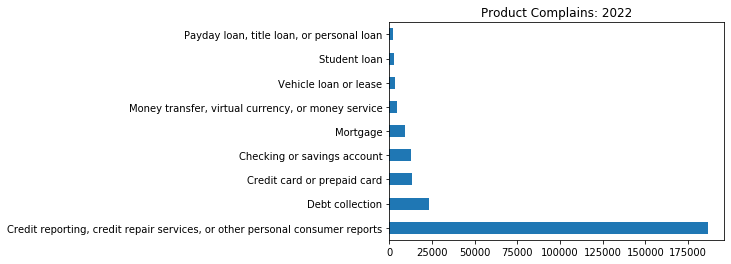

In [13]:
data_2022[category].value_counts().plot(title="{} Complains: 2022".format(category), kind="barh")
plt.show()

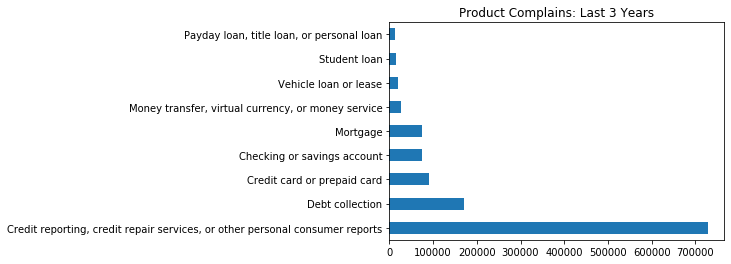

In [14]:
data_last3_years[category].value_counts().plot(title="{} Complains: Last 3 Years".format(category), kind="barh")
plt.show()

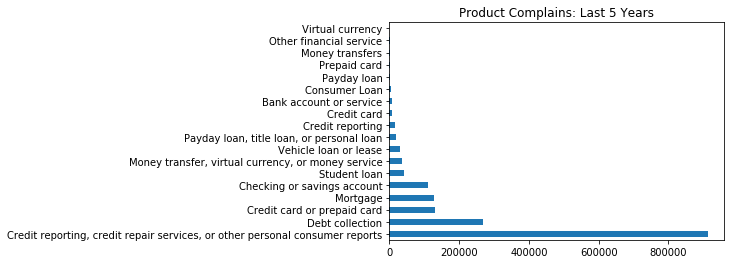

In [15]:
data_last5_years[category].value_counts().plot(title="{} Complains: Last 5 Years".format(category), kind="barh")
plt.show()

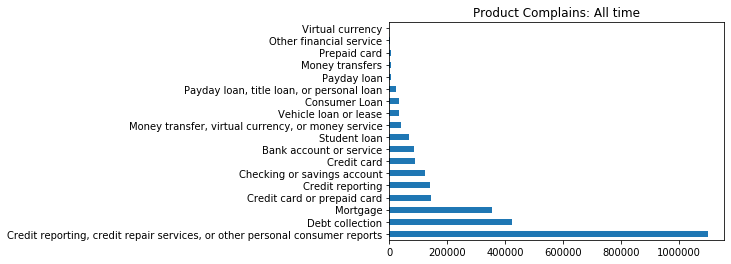

In [16]:
data[category].value_counts().plot(title="{} Complains: All time".format(category), kind="barh")
plt.show()

We analysis the product complains and few observations are present here.
1. Total of 18 categories of Product is given in the data but for last 3 years the number of categories has come to 9. 
2. Number of Complains category wise are approximately same in proportion. i.e. Credit Card report and other report services are always at top of complaints followed by debt collection. 

# Complain Issues

In [17]:
category = "Issue"

In [18]:
data_2022[category].value_counts()

Incorrect information on your report                                                81733
Problem with a credit reporting company's investigation into an existing problem    53677
Improper use of your report                                                         46230
Attempts to collect debt not owed                                                   12096
Managing an account                                                                  7981
                                                                                    ...  
Problem with overdraft                                                                  6
Overdraft, savings, or rewards features                                                 5
Incorrect exchange rate                                                                 5
Problem with an overdraft                                                               1
Was approved for a loan, but didn't receive money                                       1
Name: Issu

In [19]:
print("{} for 2022:".format(category), len(data_2022[category].value_counts()))
print("{} for Last 3 Years".format(category), len(data_last3_years[category].value_counts()))
print("{} for Last 5 Years".format(category), len(data_last5_years[category].value_counts()))
print("{} for All Time".format(category), len(data[category].value_counts()))

Issue for 2022: 78
Issue for Last 3 Years 81
Issue for Last 5 Years 160
Issue for All Time 165


Since we have lot of Issues, we are taking only top 20

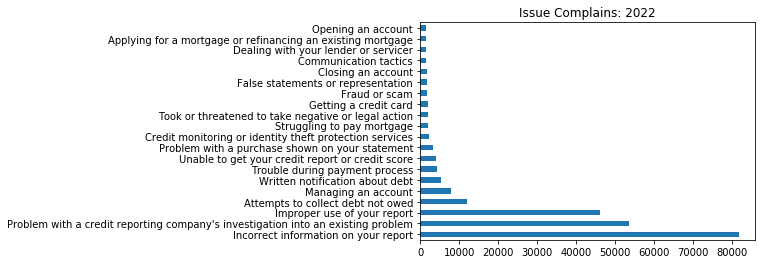

In [20]:
data_2022[category].value_counts()[:20].plot(title="{} Complains: 2022".format(category), kind="barh")
plt.show()

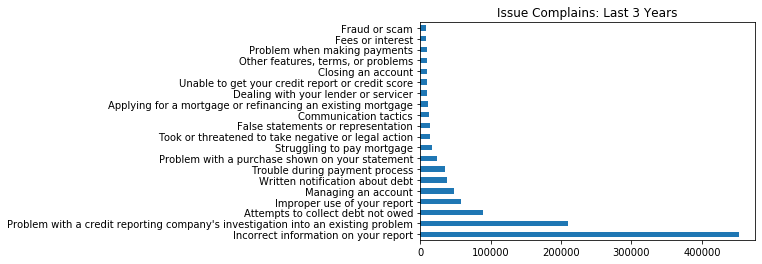

In [21]:
data_last3_years[category].value_counts()[:20].plot(title="{} Complains: Last 3 Years".format(category), kind="barh")
plt.show()

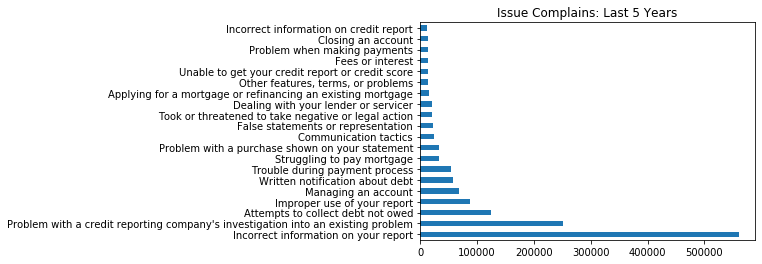

In [22]:
data_last5_years[category].value_counts()[:20].plot(title="{} Complains: Last 5 Years".format(category), kind="barh")
plt.show()

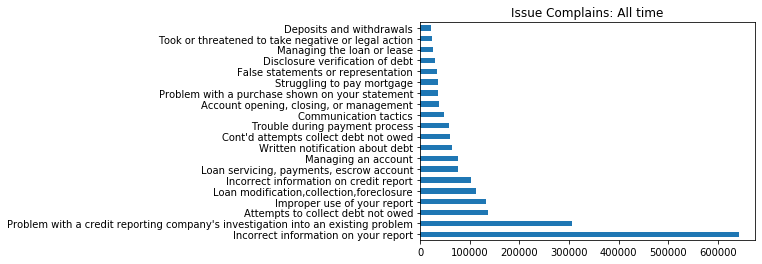

In [23]:
data[category].value_counts()[:20].plot(title="{} Complains: All time".format(category), kind="barh")
plt.show()

### Observations:
1. Number of Issues in Last 3 years are reduced to approxiamtely 80 which were 160 till 5 years ago. 
2. Number of complains regarding the issues remain same across proportion.

# Complain Per Company

In [24]:
category = "Company"

In [25]:
data_2022[category].value_counts()

TRANSUNION INTERMEDIATE HOLDINGS, INC.    59044
EQUIFAX, INC.                             58821
Experian Information Solutions Inc.       52062
CAPITAL ONE FINANCIAL CORPORATION          4596
BANK OF AMERICA, NATIONAL ASSOCIATION      4290
                                          ...  
Empower Finance, Inc.                         1
Associated Management Services, Inc..         1
Keystone Equipment Finance Corp.              1
ASG Solutions LLC                             1
D.S. Erickson & Associates, PLLC              1
Name: Company, Length: 2316, dtype: int64

In [26]:
print("{} for 2022:".format(category), len(data_2022[category].value_counts()))
print("{} for Last 3 Years".format(category), len(data_last3_years[category].value_counts()))
print("{} for Last 5 Years".format(category), len(data_last5_years[category].value_counts()))
print("{} for All Time".format(category), len(data[category].value_counts()))

Company for 2022: 2316
Company for Last 3 Years 4660
Company for Last 5 Years 5579
Company for All Time 6373


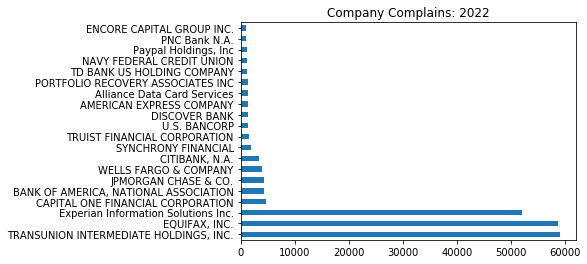

In [27]:
data_2022[category].value_counts()[:20].plot(title="{} Complains: 2022".format(category), kind="barh")
plt.show()

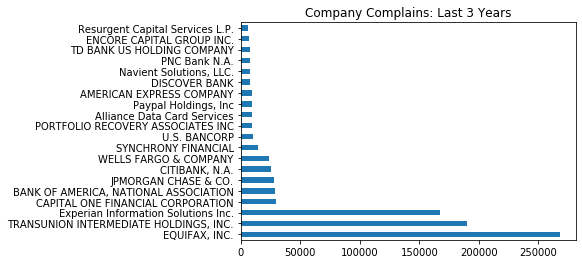

In [28]:
data_last3_years[category].value_counts()[:20].plot(title="{} Complains: Last 3 Years".format(category), kind="barh")
plt.show()

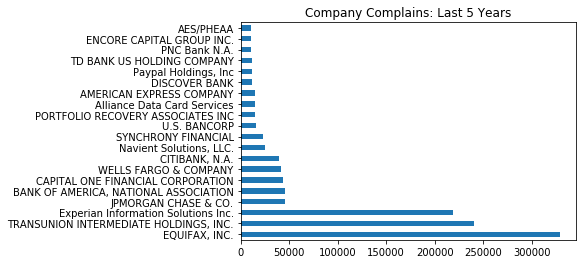

In [29]:
data_last5_years[category].value_counts()[:20].plot(title="{} Complains: Last 5 Years".format(category), kind="barh")
plt.show()

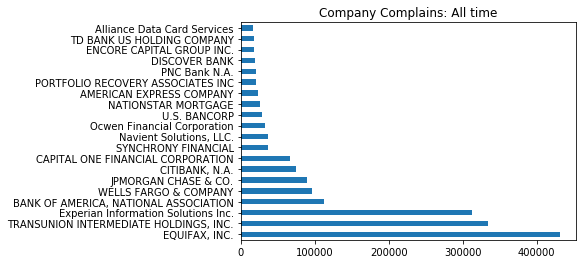

In [30]:
data[category].value_counts()[:20].plot(title="{} Complains: All time".format(category), kind="barh")
plt.show()

In [33]:
def top_products_by_company(data):
    company_top_product_complained = dict()
    top_10_companies = data[category].value_counts()[:10].index
    for company in tqdm(top_10_companies):
        company_top_product_complained[company] = list(data["Product"][data[category]==top_10_companies[5]].value_counts().index)[0]
    return company_top_product_complained

In [34]:
top_companies_product_2022 = top_products_by_company(data_2022)
for company, products in top_companies_product_2022.items():
    print(company, ":", products)

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 38.43it/s]

TRANSUNION INTERMEDIATE HOLDINGS, INC. : Checking or savings account
EQUIFAX, INC. : Checking or savings account
Experian Information Solutions Inc. : Checking or savings account
CAPITAL ONE FINANCIAL CORPORATION : Checking or savings account
BANK OF AMERICA, NATIONAL ASSOCIATION : Checking or savings account
JPMORGAN CHASE & CO. : Checking or savings account
WELLS FARGO & COMPANY : Checking or savings account
CITIBANK, N.A. : Checking or savings account
SYNCHRONY FINANCIAL : Checking or savings account
TRUIST FINANCIAL CORPORATION : Checking or savings account


In [35]:
top_companies_product_last_3_years = top_products_by_company(data_last3_years)
for company, products in top_companies_product_last_3_years.items():
    print(company, ":", products)

100%|██████████████████████████████████████████| 10/10 [00:01<00:00,  7.16it/s]

EQUIFAX, INC. : Checking or savings account
TRANSUNION INTERMEDIATE HOLDINGS, INC. : Checking or savings account
Experian Information Solutions Inc. : Checking or savings account
CAPITAL ONE FINANCIAL CORPORATION : Checking or savings account
BANK OF AMERICA, NATIONAL ASSOCIATION : Checking or savings account
JPMORGAN CHASE & CO. : Checking or savings account
CITIBANK, N.A. : Checking or savings account
WELLS FARGO & COMPANY : Checking or savings account
SYNCHRONY FINANCIAL : Checking or savings account
U.S. BANCORP : Checking or savings account


In [36]:
top_companies_product_last_5_years = top_products_by_company(data_last5_years)
for company, products in top_companies_product_last_5_years.items():
    print(company, ":", products)

100%|██████████████████████████████████████████| 10/10 [00:02<00:00,  4.93it/s]

EQUIFAX, INC. : Credit card or prepaid card
TRANSUNION INTERMEDIATE HOLDINGS, INC. : Credit card or prepaid card
Experian Information Solutions Inc. : Credit card or prepaid card
JPMORGAN CHASE & CO. : Credit card or prepaid card
BANK OF AMERICA, NATIONAL ASSOCIATION : Credit card or prepaid card
CAPITAL ONE FINANCIAL CORPORATION : Credit card or prepaid card
WELLS FARGO & COMPANY : Credit card or prepaid card
CITIBANK, N.A. : Credit card or prepaid card
Navient Solutions, LLC. : Credit card or prepaid card
SYNCHRONY FINANCIAL : Credit card or prepaid card


In [37]:
top_companies_product = top_products_by_company(data)
for company, products in top_companies_product.items():
    print(company, ":", products)

100%|██████████████████████████████████████████| 10/10 [00:02<00:00,  3.56it/s]

EQUIFAX, INC. : Mortgage
TRANSUNION INTERMEDIATE HOLDINGS, INC. : Mortgage
Experian Information Solutions Inc. : Mortgage
BANK OF AMERICA, NATIONAL ASSOCIATION : Mortgage
WELLS FARGO & COMPANY : Mortgage
JPMORGAN CHASE & CO. : Mortgage
CITIBANK, N.A. : Mortgage
CAPITAL ONE FINANCIAL CORPORATION : Mortgage
SYNCHRONY FINANCIAL : Mortgage
Navient Solutions, LLC. : Mortgage


In [46]:
def timely_response_by_company(dataframe):
    timley_response = dict()
    top_10_companies = dataframe[category].value_counts()[:10].index
    for company in tqdm(top_10_companies):
        temp = dataframe["Timely response?"][dataframe["Company"]==company].value_counts()
        timley_response[company] = temp["Yes"]/sum(temp)*100
    return timley_response

In [47]:
timley_response_2022 = timely_response_by_company(data_2022)
for company, response_percent in timley_response_2022.items():
    print(company,":",response_percent)

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 32.69it/s]

TRANSUNION INTERMEDIATE HOLDINGS, INC. : 100.0
EQUIFAX, INC. : 100.0
Experian Information Solutions Inc. : 100.0
CAPITAL ONE FINANCIAL CORPORATION : 100.0
BANK OF AMERICA, NATIONAL ASSOCIATION : 97.83216783216783
JPMORGAN CHASE & CO. : 100.0
WELLS FARGO & COMPANY : 100.0
CITIBANK, N.A. : 100.0
SYNCHRONY FINANCIAL : 100.0
TRUIST FINANCIAL CORPORATION : 98.32904884318766


In [48]:
timley_response_last_3_years = timely_response_by_company(data_last3_years)
for company, response_percent in timley_response_last_3_years.items():
    print(company,":",response_percent)

100%|██████████████████████████████████████████| 10/10 [00:01<00:00,  7.43it/s]

EQUIFAX, INC. : 99.91524727633868
TRANSUNION INTERMEDIATE HOLDINGS, INC. : 99.87260945322082
Experian Information Solutions Inc. : 99.99880387782808
CAPITAL ONE FINANCIAL CORPORATION : 99.95325542570951
BANK OF AMERICA, NATIONAL ASSOCIATION : 95.39614937876175
JPMORGAN CHASE & CO. : 100.0
CITIBANK, N.A. : 99.96414342629481
WELLS FARGO & COMPANY : 97.34421179702785
SYNCHRONY FINANCIAL : 100.0
U.S. BANCORP : 100.0


In [49]:
timley_response_last_5_years = timely_response_by_company(data_last5_years)
for company, response_percent in timley_response_last_5_years.items():
    print(company,":",response_percent)

100%|██████████████████████████████████████████| 10/10 [00:02<00:00,  4.01it/s]

EQUIFAX, INC. : 99.46199421217756
TRANSUNION INTERMEDIATE HOLDINGS, INC. : 99.86644087824484
Experian Information Solutions Inc. : 99.9986292857665
JPMORGAN CHASE & CO. : 99.9824326401546
BANK OF AMERICA, NATIONAL ASSOCIATION : 97.07918507285555
CAPITAL ONE FINANCIAL CORPORATION : 99.96087276744615
WELLS FARGO & COMPANY : 95.30063517837529
CITIBANK, N.A. : 99.92163009404389
Navient Solutions, LLC. : 99.99197206277847
SYNCHRONY FINANCIAL : 100.0


In [50]:
timley_response_data = timely_response_by_company(data)
for company, response_percent in timley_response_data.items():
    print(company,":",response_percent)

100%|██████████████████████████████████████████| 10/10 [00:02<00:00,  3.60it/s]

EQUIFAX, INC. : 99.58945533789287
TRANSUNION INTERMEDIATE HOLDINGS, INC. : 99.90350143403441
Experian Information Solutions Inc. : 99.99711588378935
BANK OF AMERICA, NATIONAL ASSOCIATION : 97.35451611759282
WELLS FARGO & COMPANY : 96.04729133580378
JPMORGAN CHASE & CO. : 99.89327404113396
CITIBANK, N.A. : 99.50900163666121
CAPITAL ONE FINANCIAL CORPORATION : 99.87573920203609
SYNCHRONY FINANCIAL : 99.95430476036879
Navient Solutions, LLC. : 99.99175348415295


In [64]:
top_10_companies = data["Company"].value_counts()[:10].index
for company in top_10_companies:
    temp = data[(data["Company"]==company) & (data["Company response to consumer"] == "In progress")]
    if len(temp):
        print(company,":",min(temp["Date received"]))
    else:
        print(company,": No Complains Remaning")

EQUIFAX, INC. : 2020-02-24
TRANSUNION INTERMEDIATE HOLDINGS, INC. : 2020-05-05
Experian Information Solutions Inc. : 2019-06-09
BANK OF AMERICA, NATIONAL ASSOCIATION : 2020-03-19
WELLS FARGO & COMPANY : 2022-03-26
JPMORGAN CHASE & CO. : 2022-03-07
CITIBANK, N.A. : 2022-03-23
CAPITAL ONE FINANCIAL CORPORATION : 2020-11-03
SYNCHRONY FINANCIAL : 2022-03-13
Navient Solutions, LLC. : 2022-03-22


In [66]:
top_10_companies = data["Company"].value_counts()[:10].index
for company in top_10_companies:
    temp = data[(data["Company"]==company) & (data["Company response to consumer"] == "In progress")]
    print(company,":",len(temp["Date received"]))

EQUIFAX, INC. : 2016
TRANSUNION INTERMEDIATE HOLDINGS, INC. : 19910
Experian Information Solutions Inc. : 12822
BANK OF AMERICA, NATIONAL ASSOCIATION : 765
WELLS FARGO & COMPANY : 98
JPMORGAN CHASE & CO. : 358
CITIBANK, N.A. : 16
CAPITAL ONE FINANCIAL CORPORATION : 264
SYNCHRONY FINANCIAL : 207
Navient Solutions, LLC. : 2


### Observation:
1. Top 10 Companies with compnies is same across all time periods.
2. Top Product across top 10 companies is same  for any give time period.
3. Products are changed across all time periods.
4. Timley Response of all top companies is more than 97%. This increases trust in complain resolution system as well as company.
5. For top 10 Companies, Last complaint is for "Experian Information Solutions Inc." in Jun 2019.
6. Among top Companies, "TRANSUNION INTERMEDIATE HOLDINGS, INC." has maximum complain of 19910 followed by "Experian Information Solutions Inc." : 12822. 

# Response to consumer

In [51]:
category = "Company response to consumer"

In [52]:
data_2022[category].value_counts()

Closed with explanation            152498
Closed with non-monetary relief     57875
In progress                         41185
Closed with monetary relief          5039
Untimely response                     537
Name: Company response to consumer, dtype: int64

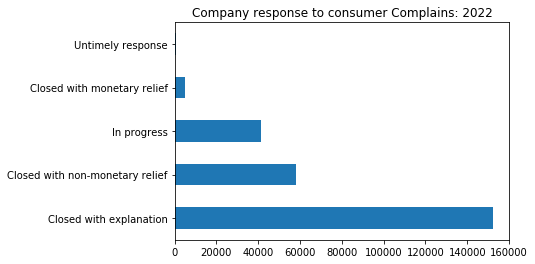

In [53]:
data_2022[category].value_counts().plot(title="{} Complains: 2022".format(category), kind="barh")
plt.show()

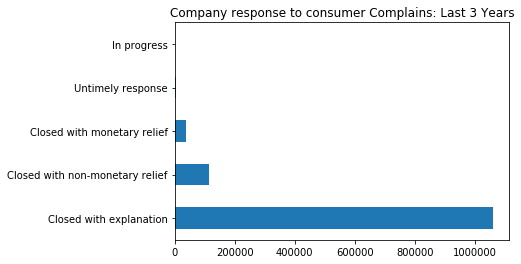

In [54]:
data_last3_years[category].value_counts().plot(title="{} Complains: Last 3 Years".format(category), kind="barh")
plt.show()

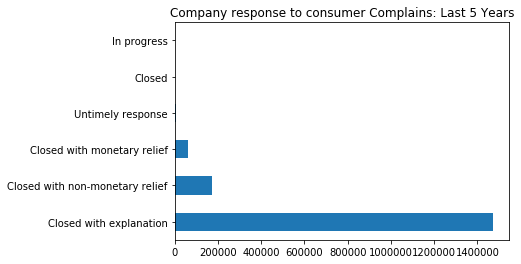

In [55]:
data_last5_years[category].value_counts().plot(title="{} Complains: Last 5 Years".format(category), kind="barh")
plt.show()

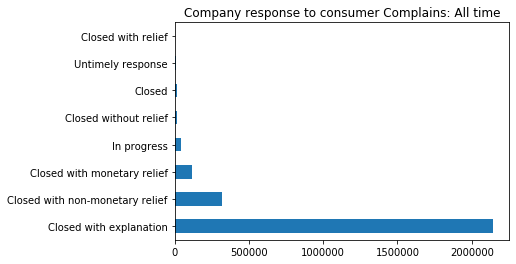

In [56]:
data[category].value_counts().plot(title="{} Complains: All time".format(category), kind="barh")
plt.show()

In [57]:
check_data = data[data[category]=="In progress"]
print(min(check_data["Date received"][check_data["Date received"] < '2022-01-01']))

2019-06-09


In [68]:
temp = data["Company"][data["Company response to consumer"] == "In progress"].value_counts()
temp[temp > 500]

TRANSUNION INTERMEDIATE HOLDINGS, INC.    19910
Experian Information Solutions Inc.       12822
EQUIFAX, INC.                              2016
BANK OF AMERICA, NATIONAL ASSOCIATION       765
Name: Company, dtype: int64

### Observations:
1. Most of the Complains are closed with explanation. 
2. There are no complain pending for last 3 years or 5 years. The oldest complain in progress is received on "09 June 2019".
3. Company with very high complaints are:<br>
    "TRANSUNION INTERMEDIATE HOLDINGS, INC." : 19910<br>
    "Experian Information Solutions Inc."    : 12822<br>
    "EQUIFAX, INC."                          :  2016<br>
    "BANK OF AMERICA, NATIONAL ASSOCIATION"  :  765<br>

# Complaints Submitted Via

In [70]:
category = "Submitted via"

In [71]:
data_2022[category].value_counts()

Web             239147
Phone             8764
Referral          7066
Postal mail       2026
Web Referral       130
Email                1
Name: Submitted via, dtype: int64

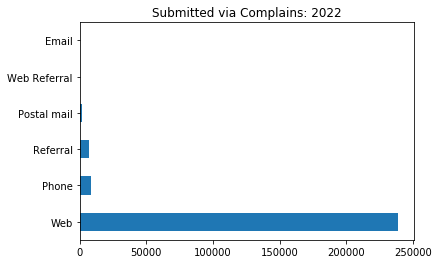

In [72]:
data_2022[category].value_counts().plot(title="{} Complains: 2022".format(category), kind="barh")
plt.show()

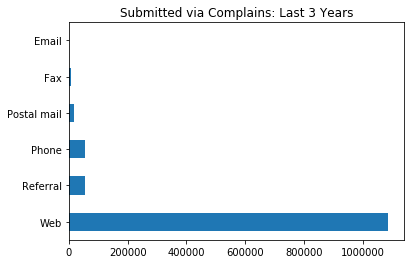

In [73]:
data_last3_years[category].value_counts().plot(title="{} Complains: Last 3 Years".format(category), kind="barh")
plt.show()

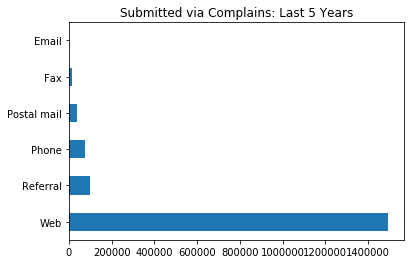

In [74]:
data_last5_years[category].value_counts().plot(title="{} Complains: Last 5 Years".format(category), kind="barh")
plt.show()

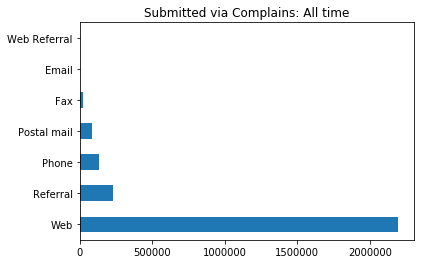

In [75]:
data[category].value_counts().plot(title="{} Complains: All time".format(category), kind="barh")
plt.show()

### Observations:
1. Number of Complains by Fax is decreasing with no complain by fax in year 2022.
2. Proportion of Complains of Referral to Phone is decreasing with each period with 2022 surpassing this i.e. More Complains are received by Phone than Referral.

# Responses Given on Time

In [76]:
category = "Timely response?"

In [77]:
data_2022[category].value_counts()

Yes    255607
No       1527
Name: Timely response?, dtype: int64

In [78]:
data_last3_years[category].value_counts()

Yes    1202495
No       15198
Name: Timely response?, dtype: int64

In [79]:
data_last5_years[category].value_counts()

Yes    1691173
No       26735
Name: Timely response?, dtype: int64

In [80]:
data[category].value_counts()

Yes    2624265
No       47408
Name: Timely response?, dtype: int64

<h3>Timely Response:</h3>
  2022: 99.4%<br>
  Last 3 Years: 98.75%<br>
  Last 5 Years: 98.44%<br>
  All Time: 98.22%

# Consumer Disputed

In [81]:
category = "Consumer disputed?"

In [82]:
data_2022[category].value_counts()

Series([], Name: Consumer disputed?, dtype: int64)

In [83]:
print("Data not available for:",sum(data_2022[category].isna()))

Data not available for: 257134


In [84]:
print("Size of data:", len(data_2022[category]))

Size of data: 257134


In [85]:
print("Data not available for:",sum(data_last3_years[category].isna()))

Data not available for: 1217693


In [86]:
print("Size of data:", len(data_last3_years[category]))

Size of data: 1217693


In [87]:
print("Consumer Dispute Data Not Available For Last 5 Years:", sum(data_last5_years[category].isna())/len(data_last5_years)*100)
print("Consumer Dispute Data Available For Last 5 Years:", sum(data_last5_years[category].value_counts())/len(data_last5_years)*100)

Consumer Dispute Data Not Available For Last 5 Years: 95.78778374627744
Consumer Dispute Data Available For Last 5 Years: 4.212216253722551


In [88]:
print("Consumer Dispute Data Not Available For All Time:", sum(data[category].isna())/len(data)*100)
print("Consumer Dispute Data Available For All Time:", sum(data[category].value_counts())/len(data)*100)

Consumer Dispute Data Not Available For All Time: 71.23682426704167
Consumer Dispute Data Available For All Time: 28.763175732958334


### Observations:

For the Consumer Dispute Respose, data is not available for the 3 years.

For the Data of Last 5 years: 
*   Dispute Respose Data is not available for: 95.79%
*   Dispute Respose Data is available for only: 4.21%

For All Time Data:
*   Dispute Respose Data is not available for: 95.79%
*   Dispute Respose Data is available for only: 28.76%


# Correlation

In [89]:
columns = ["Product", "Issue", "Tags", "Company", "Company response to consumer",
           "Timely response?", "Submitted via", "Company public response"]

In [90]:
def factorize(data, columns=columns):
    data = data[columns]
    for column in data.columns:
        data[column] = data[column].factorize(0)[0]
    return data

In [91]:
data_2022_factorize = factorize(data_2022, columns)
data_last3_years_factorize = factorize(data_last3_years, columns)
data_last5_years_factorize = factorize(data_last5_years, columns)
data_factorize = factorize(data, columns)

C:\Users\Billionare\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [92]:
data_2022_factorize.corr()

,Product,Issue,Tags,Company,Company response to consumer,Timely response?,Submitted via,Company public response
Product,1.000000,0.528980,0.095538,0.333288,0.165009,0.081532,0.032315,0.046813
Issue,0.528980,1.000000,0.158946,0.280592,0.167710,0.063107,0.135661,0.018724
Tags,0.095538,0.158946,1.000000,0.073764,0.066584,0.017543,0.142027,0.024776
Company,0.333288,0.280592,0.073764,1.000000,0.173485,0.209370,0.060517,0.066996
Company response to consumer,0.165009,0.167710,0.066584,0.173485,1.000000,0.119898,0.072641,0.088112
Timely response?,0.081532,0.063107,0.017543,0.209370,0.119898,1.000000,0.011310,0.005490
Submitted via,0.032315,0.135661,0.142027,0.060517,0.072641,0.011310,1.000000,0.010642
Company public response,0.046813,0.018724,0.024776,0.066996,0.088112,0.005490,0.010642,1.000000


In [93]:
data_last3_years_factorize.corr()

,Product,Issue,Tags,Company,Company response to consumer,Timely response?,Submitted via,Company public response
Product,1.000000,-0.077122,-0.022536,-0.283529,0.057266,-0.067303,0.033643,-0.056670
Issue,-0.077122,1.000000,0.111328,0.148219,0.034975,0.058950,0.104030,-0.035623
Tags,-0.022536,0.111328,1.000000,0.043791,0.016508,0.013223,0.040874,0.033689
Company,-0.283529,0.148219,0.043791,1.000000,-0.035760,0.197140,0.014414,0.084557
Company response to consumer,0.057266,0.034975,0.016508,-0.035760,1.000000,0.010572,0.015318,0.036481
Timely response?,-0.067303,0.058950,0.013223,0.197140,0.010572,1.000000,0.007798,0.000526
Submitted via,0.033643,0.104030,0.040874,0.014414,0.015318,0.007798,1.000000,0.018852
Company public response,-0.056670,-0.035623,0.033689,0.084557,0.036481,0.000526,0.018852,1.000000


In [94]:
data_last5_years_factorize.corr()

,Product,Issue,Tags,Company,Company response to consumer,Timely response?,Submitted via,Company public response
Product,1.000000,0.202709,-0.011951,-0.252610,0.065806,-0.061262,0.038917,-0.067263
Issue,0.202709,1.000000,0.087096,0.091638,0.034505,0.046729,0.074350,-0.015542
Tags,-0.011951,0.087096,1.000000,0.032483,0.011526,0.010428,-0.008518,0.030047
Company,-0.252610,0.091638,0.032483,1.000000,-0.036174,0.214962,0.000797,0.090160
Company response to consumer,0.065806,0.034505,0.011526,-0.036174,1.000000,0.008113,0.014487,0.031945
Timely response?,-0.061262,0.046729,0.010428,0.214962,0.008113,1.000000,0.005045,-0.004740
Submitted via,0.038917,0.074350,-0.008518,0.000797,0.014487,0.005045,1.000000,0.017988
Company public response,-0.067263,-0.015542,0.030047,0.090160,0.031945,-0.004740,0.017988,1.000000


In [95]:
data_factorize.corr()

,Product,Issue,Tags,Company,Company response to consumer,Timely response?,Submitted via,Company public response
Product,1.000000,0.785753,0.079265,0.121410,0.139341,0.041985,0.143158,0.133161
Issue,0.785753,1.000000,0.093918,0.141438,0.188974,0.048250,0.187726,0.124584
Tags,0.079265,0.093918,1.000000,0.034554,0.031410,0.009085,0.059760,0.026205
Company,0.121410,0.141438,0.034554,1.000000,0.106343,0.236016,0.020536,0.042910
Company response to consumer,0.139341,0.188974,0.031410,0.106343,1.000000,0.123560,0.066045,-0.018063
Timely response?,0.041985,0.048250,0.009085,0.236016,0.123560,1.000000,0.007419,-0.014727
Submitted via,0.143158,0.187726,0.059760,0.020536,0.066045,0.007419,1.000000,0.015862
Company public response,0.133161,0.124584,0.026205,0.042910,-0.018063,-0.014727,0.015862,1.000000


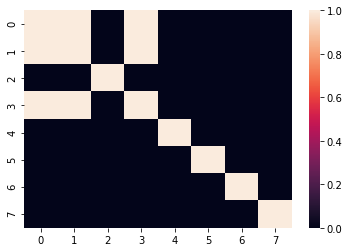

In [96]:
sns.heatmap(np.abs(data_2022_factorize.corr().values)>0.25)
plt.show()

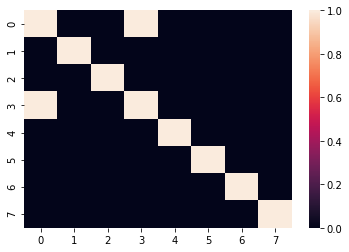

In [97]:
sns.heatmap(np.abs(data_last3_years_factorize.corr().values)>0.25)
plt.show()

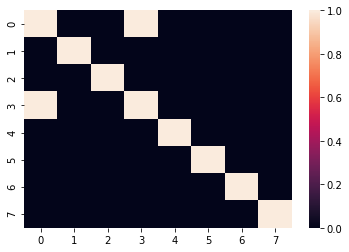

In [98]:
sns.heatmap(np.abs(data_last5_years_factorize.corr().values)>0.25)
plt.show()

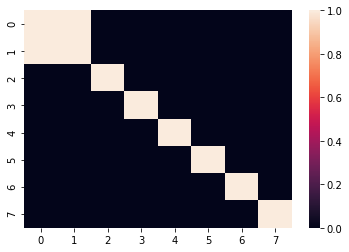

In [99]:
sns.heatmap(np.abs(data_factorize.corr().values)>0.25)
plt.show()

### Observations:
1. <b>Timely Respose</b> and **Company response to consumer** are correlating more with **Companies Public Response** as the year progress. i.e. High Negative Correlation value for all time became positive in Last 3 years and increased in 2022.
2. **Company, Timely respose, Submitted via** are very low correlated with **Issue** but steadily increasing.

# Additional Points


This is very basic analysis. We can combine two features, three features or more to gather new insights from the data.
1. Instead of taking by few period, report can be gathered for each year.